In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
gender=pd.read_csv("C:\\Users\\anujr\\OneDrive\\Documents\\data analyst\\ml raw data files\\gender_classification_v7.csv")

In [6]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# **Data Cleaning Process**

In [7]:
gender.isnull() # checking for null values

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [8]:
gender.shape # there are 5001 rows and 8 observations

(5001, 8)

In [9]:
gender.info() # there is only one column [ gender] who have object data type
# we have to convert it into int because of machine learning model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [10]:
gender.isnull().sum() # there is no missing values in our dataset

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [11]:
## check for duplicate values
gender.duplicated() #there are some values are duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4996     True
4997     True
4998     True
4999     True
5000     True
Length: 5001, dtype: bool

In [12]:
gender.duplicated().sum() # there are 1768 values are duplicated

1768

In [13]:
gender_dupli=gender[gender.duplicated] #storing duplicated values in new variable

In [14]:
gender_dupli.head(10) # after checking the values there are no duplicated values

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
59,1,14.1,5.9,0,0,0,0,Female
66,1,14.2,6.2,0,0,0,0,Female
175,1,12.7,5.7,1,1,1,1,Male
230,1,12.9,5.1,0,0,0,0,Female
261,1,13.0,6.2,1,1,1,1,Male
278,1,14.1,6.0,0,0,0,0,Female
279,1,12.5,7.0,1,1,1,1,Male
307,1,14.2,7.1,1,1,1,1,Male
314,1,15.2,6.0,1,1,1,1,Male
323,1,11.5,5.7,0,0,0,0,Female


# Our data is fully cleaned

In [15]:
int_float_var=gender.select_dtypes(include=['int64']) #storing numeric data type columns in a variable

In [16]:
int_float_var.head(10)

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,1,0,1,1
1,0,0,0,1,0
2,0,1,1,1,1
3,0,0,1,1,1
4,1,0,0,0,0
5,1,1,1,1,1
6,1,1,1,1,0
7,0,0,0,0,0
8,1,1,0,1,1
9,1,0,0,0,0


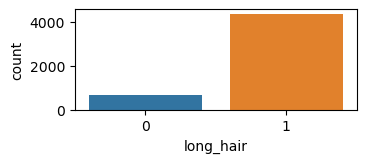

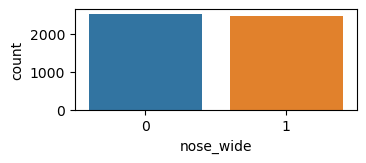

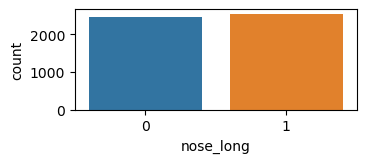

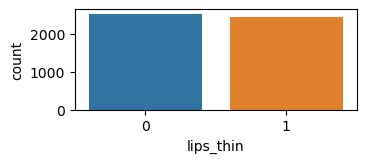

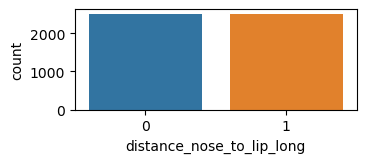

In [17]:

for var in int_float_var:
  plt.figure(figsize=(8, 6))
  plt.subplot(4,2,2)
  sns.countplot(x=var,data=int_float_var)


In [18]:
int_float_var.keys()

Index(['long_hair', 'nose_wide', 'nose_long', 'lips_thin',
       'distance_nose_to_lip_long'],
      dtype='object')

In [19]:
gender["long_hair"].value_counts()


1    4349
0     652
Name: long_hair, dtype: int64

In [20]:
gender["nose_wide"].value_counts()


0    2531
1    2470
Name: nose_wide, dtype: int64

In [21]:
gender["nose_long"].value_counts()



1    2540
0    2461
Name: nose_long, dtype: int64

In [22]:
gender["lips_thin"].value_counts()


0    2535
1    2466
Name: lips_thin, dtype: int64

In [23]:
gender["distance_nose_to_lip_long"].value_counts()

0    2506
1    2495
Name: distance_nose_to_lip_long, dtype: int64

In [24]:
# replace male into 1 and female into 0
gender['gender']=gender['gender'].replace({'Male':1,"Female":0})

In [25]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


# built machine learning model using linear regression


In [26]:
y=gender["gender"] #dependent variable
x=gender.drop('gender',axis=1) # independent variable

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [28]:
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (4000, 7)
shape of y_train (4000,)
shape of x_test (1001, 7)
shape of y_test (1001,)


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lc=LinearRegression()

In [31]:
lc.fit(x_train,y_train)

LinearRegression()

In [32]:
lc.coef_

array([-0.01783033,  0.02694186,  0.04533044,  0.27868573,  0.26689621,
        0.25717981,  0.27889444])

In [33]:
lc.intercept_

-0.648683344321263

In [34]:
x_test.iloc[0,:]

long_hair                     1.0
forehead_width_cm            12.7
forehead_height_cm            5.5
nose_wide                     1.0
nose_long                     1.0
lips_thin                     1.0
distance_nose_to_lip_long     1.0
Name: 3936, dtype: float64

In [35]:
lc.predict([x_test.iloc[0,:]])

C:\Users\anujr\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.00662162])

In [36]:
lc.score(x_test,y_test) #our model is 85 percent accurate

0.8556987096171041

In [37]:
test_predict=lc.predict(x_test)

In [38]:
x_test_pred=pd.DataFrame(test_predict)

In [39]:
x_test_pred

,0
0,1.006622
1,1.099336
2,0.248806
3,-0.060324
4,-0.030688
...,...
996,-0.071485
997,-0.049849
998,0.251419
999,-0.083972


In [40]:
gender.loc[(gender['long_hair']==1.0) & (gender['forehead_height_cm']==5.5)& (gender['forehead_width_cm']==12.7)] # checking for accuracy

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
532,1,12.7,5.5,0,0,0,0,0
1094,1,12.7,5.5,0,1,1,0,0
1911,1,12.7,5.5,0,0,0,0,0
3934,1,12.7,5.5,1,1,1,1,1
3936,1,12.7,5.5,1,1,1,1,1
4303,1,12.7,5.5,0,0,0,1,0


In [42]:
gender.iloc[3]

long_hair                     0.0
forehead_width_cm            14.4
forehead_height_cm            6.1
nose_wide                     0.0
nose_long                     1.0
lips_thin                     1.0
distance_nose_to_lip_long     1.0
gender                        1.0
Name: 3, dtype: float64

In [44]:
input_data=[0,11.2,6.1,1,0,1,1]
input_data_array=np.asarray(input_data)
input_data_reshape=input_data_array.reshape(1,-1)
prediction=lc.predict(input_data_reshape)
print(prediction)

[0.74434121]


C:\Users\anujr\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
